In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('keywords_data.csv')

# 1. Convert Date to Datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# 2. Define the target domain's rank and landing page columns
# Using Yachting Pages as the example
rank_col = 'yatchingpages.com_cleaned_rank'
url_col = 'yachting-pages.com_landing'

# Sort by date to ensure the timeline is correct
df = df.sort_values(by='Date')

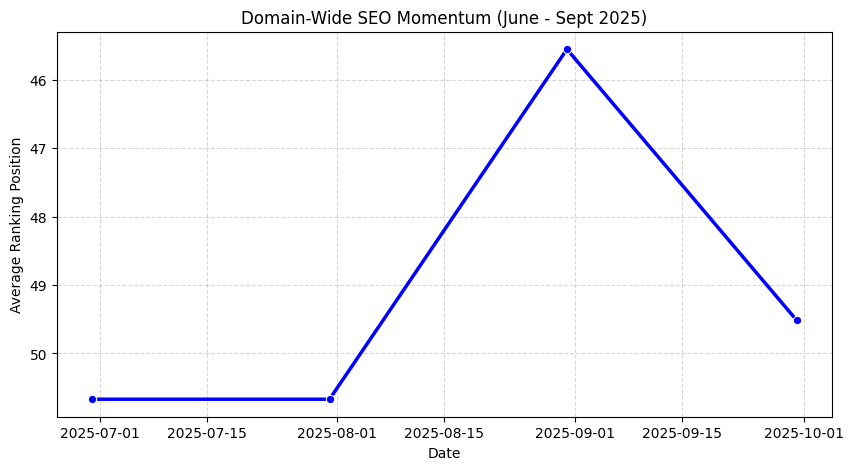

In [2]:
# Aggregate average rank by month
monthly_trend = df.groupby('Date')[rank_col].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trend, x='Date', y=rank_col, marker='o', color='blue', linewidth=2.5)

# Invert Y-Axis because Rank 1 is better than Rank 50
plt.gca().invert_yaxis()
plt.title('Domain-Wide SEO Momentum (June - Sept 2025)')
plt.ylabel('Average Ranking Position')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [3]:
# Pivot data to see the rank of each Landing Page over time
# We aggregate by URL (Mean rank if multiple keywords point to one URL)
path_decay = df.pivot_table(index=url_col, columns='Date', values=rank_col, aggfunc='mean')

# Filter for pages that exist in both the first and last month
first_month = path_decay.columns.min()
last_month = path_decay.columns.max()
decay_df = path_decay[[first_month, last_month]].dropna()

# Calculate the "Decay Score" (Change in rank)
decay_df['Decay_Score'] = decay_df[last_month] - decay_df[first_month]

# Sort by the worst decay (Largest increase in rank number)
top_decaying_pages = decay_df.sort_values(by='Decay_Score', ascending=False).head(10)

print("--- Top 10 Decaying Landing Pages (Losing Rankings) ---")
print(top_decaying_pages)

--- Top 10 Decaying Landing Pages (Losing Rankings) ---
Date                                                2025-06-30 00:00:00  \
yachting-pages.com_landing                                                
https://www.yachting-pages.com/articles/the-bes...              4.00000   
https://www.yachting-pages.com/articles/an-intr...             33.00000   
https://www.yachting-pages.com/listing/cosmo-cr...             36.00000   
https://www.yachting-pages.com/articles/top-lux...             57.20000   
https://www.yachting-pages.com/listing/metal-wo...             34.00000   
https://www.yachting-pages.com/listing/yacht-ma...             30.47619   
https://www.yachting-pages.com/articles/yacht-l...             11.40000   
https://www.yachting-pages.com/listing/yacht-bo...             11.00000   
https://www.yachting-pages.com/listing/elite-su...             31.00000   
https://www.yachting-pages.com/listing/yacht-bo...              7.60000   

Date                                       

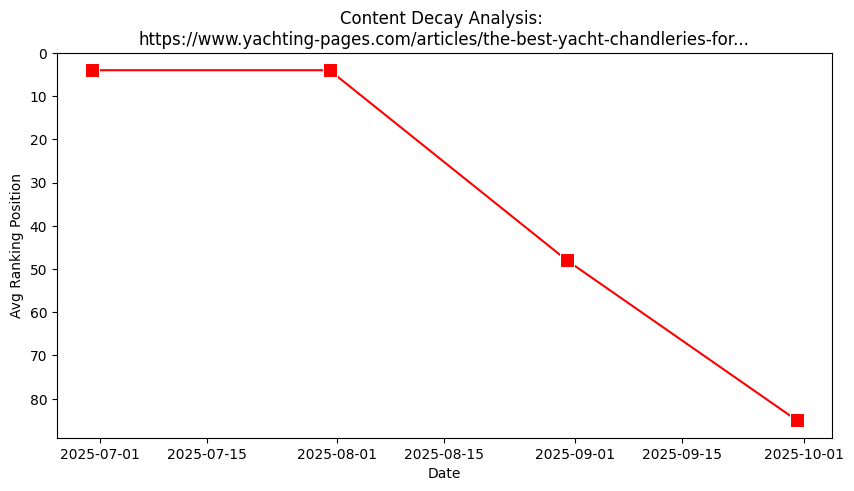

In [4]:
# Pick the top decaying URL
problem_url = top_decaying_pages.index[0]

# Filter main DF for this URL
url_trend = df[df[url_col] == problem_url].groupby('Date')[rank_col].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=url_trend, x='Date', y=rank_col, marker='s', color='red', markersize=10)
plt.gca().invert_yaxis()
plt.title(f'Content Decay Analysis: \n{problem_url[:70]}...')
plt.ylabel('Avg Ranking Position')
plt.show()